In [1]:
import numpy as np 
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.DataFrame({
    "x" :[1,2,3],
    "y" : [1,3,4]
})

In [3]:
df

,x,y
0,1,1
1,2,3
2,3,4


In [4]:
# calculating mean 
X_mean = df["x"].mean()
y_mean = df["y"].mean()
X_mean , y_mean

(np.float64(2.0), np.float64(2.6666666666666665))

In [5]:
# calculating slope and intercept 
def intercept(X_mean, y_mean, slope):
    return (y_mean - slope*X_mean)

def slope(X , y , X_mean , y_mean):
    numerator = 0 
    denominator = 0 
    for i in range(X.shape[0]) :
        numerator += (y[i]-y_mean) * (X[i] - X_mean)
        denominator += (X[i] - X_mean)**2 
    return numerator/denominator 
    

In [6]:
X = df["x"]
y = df["y"]


In [7]:
w = slope(X , y , X_mean , y_mean)
b = intercept(X_mean , y_mean ,w)

In [8]:
w , b 

(np.float64(1.5), np.float64(-0.3333333333333335))

Text(0, 0.5, 'y')

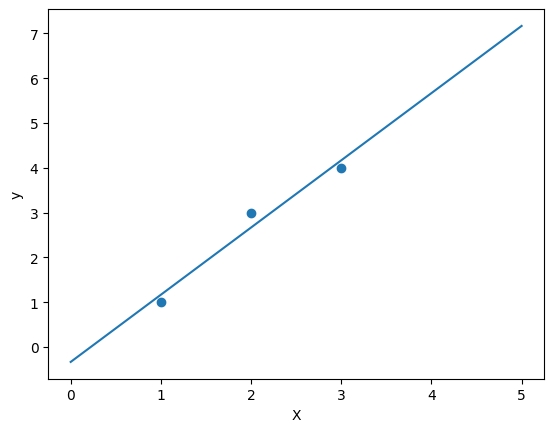

In [9]:
plt.scatter(df["x"] , df["y"])
x_ = np.linspace(0, 5 , 5)
y_ = w * x_ + b

plt.plot(x_, y_)
plt.xlabel("X")
plt.ylabel("y")

In [10]:
# error y - y_hat 
error = 0 
y_pred = [w*x + b for x in X ]
for i in range(y.shape[0]):
    error += y[i] - y_pred[i]
f"{error}"

'8.881784197001252e-16'

In [11]:
# creating using class 
class meraLR :

    def __init__(self):
        self.w = None 
        self.b = None 

    def fit(self , X, y):

        X_mean = X.mean()
        y_mean = y.mean()

        num = 0
        den = 0 
        for  i in range(X.shape[0]):
            num += (y[i]- y_mean)*(X[i] - X_mean)
            den += (X[i] - X_mean)**2
        self.w = num / den 
        self.b = y_mean - self.w*X_mean

        return self.w , self.b
    def predict(self , X):
        y_hat = [self.w*x+self.b for x in X]
        return np.array(y_hat)
        

In [12]:
lr = meraLR()

In [13]:
lr.fit(X,y)

(np.float64(1.5), np.float64(-0.3333333333333335))

In [14]:
lr.predict(X)

array([1.16666667, 2.66666667, 4.16666667])

In [15]:
X.values

array([1, 2, 3])

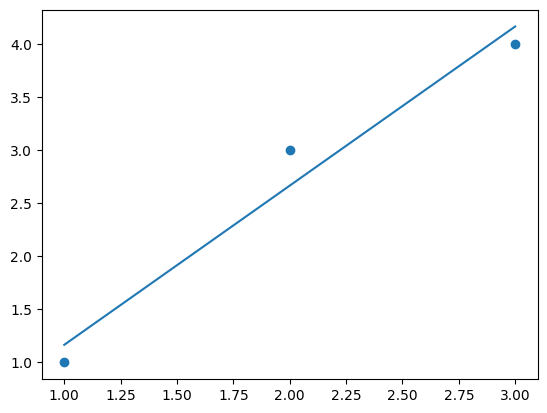

In [16]:
plt.scatter(X , y)
plt.plot(X,lr.predict(X))


In [17]:
df = pd.read_csv("placement.csv")

In [18]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [19]:
X = df["cgpa"]
y = df["package"]

In [20]:
lr = meraLR()

In [21]:
lr.fit(X,y)

(np.float64(0.5695912947937534), np.float64(-0.9856779462557332))

In [22]:
y_pred = lr.predict(X)

Text(0, 0.5, 'Package(in lpa)')

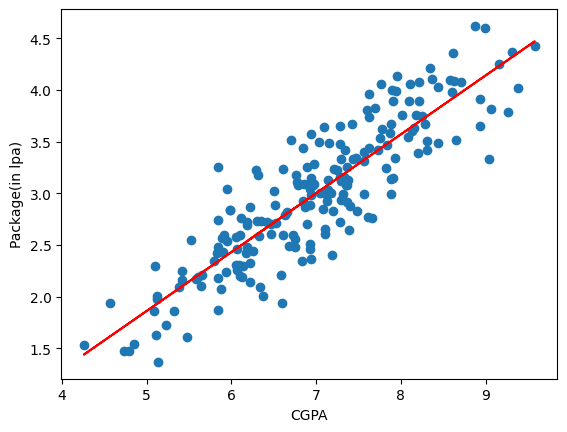

In [23]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X,lr.predict(X),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')